<a href="https://colab.research.google.com/github/ovozzx/Machine-Learning/blob/master/%5BDacon%5Dwine_quality_classification(%EB%9E%9C%EB%8D%A4%ED%8F%AC%EB%A0%88%EC%8A%A4%ED%8A%B8).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1. 코드 해석  ☑️

2. 점수 높이기(앙상블(다른 모델), 조건 추가(GridSearch)

3. 코드 안 보고 작성


https://heytech.tistory.com/149

# 앙상블 모델 = 랜덤포레스트 + 다른 분류기

# 0. 라이브러리 로딩

In [1]:
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt 
import seaborn as sns #데이터프레임 이용
#Seaborn은 Matplotlib을 기반으로 다양한 색상 테마와 통계용 차트 등의 기능을 추가한 시각화 패키지이다. 
#기본적인 시각화 기능은 Matplotlib 패키지에 의존하며 통계 기능은 Statsmodels 패키지에 의존한다.

#경고 메시지 숨기기
import warnings
warnings.filterwarnings(action='ignore')

# 1. 데이터 불러오기

In [2]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

# 2. 간단한 EDA

- index : 구분자

- quality : 품질 → y값

- fixed acidity : 산도

- volatile acidity : 휘발성산

- citric acid : 시트르산

- residual sugar 잔당 : 발효 후 와인 속에 남아있는 당분

- chlorides : 염화물

- free sulfur dioxide : 독립 이산화황

- total sulfur dioxide : 총 이산화황

- density : 밀도

- pH : 수소이온농도

- sulphates : 황산염

- alcohol : 도수

- type : 종류



In [3]:
# train 데이터의 개형을 살펴봅니다.
# index를 제외하면 총 13개 변수를 가집니다.
train.head()

,index,quality,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,type
0,0,5,5.6,0.695,0.06,6.8,0.042,9.0,84.0,0.99432,3.44,0.44,10.2,white
1,1,5,8.8,0.610,0.14,2.4,0.067,10.0,42.0,0.99690,3.19,0.59,9.5,red
2,2,5,7.9,0.210,0.39,2.0,0.057,21.0,138.0,0.99176,3.05,0.52,10.9,white
3,3,6,7.0,0.210,0.31,6.0,0.046,29.0,108.0,0.99390,3.26,0.50,10.8,white
4,4,6,7.8,0.400,0.26,9.5,0.059,32.0,178.0,0.99550,3.04,0.43,10.9,white


In [4]:
# test 데이터의 개형을 살펴봅니다.
# index를 제외하면 총 12개 변수를 가집니다.
# train 중 quality 변수가 사라졌습니다.
test.head()

,index,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,type
0,0,9.0,0.31,0.48,6.6,0.043,11.0,73.0,0.99380,2.90,0.38,11.6,white
1,1,13.3,0.43,0.58,1.9,0.070,15.0,40.0,1.00040,3.06,0.49,9.0,red
2,2,6.5,0.28,0.27,5.2,0.040,44.0,179.0,0.99480,3.19,0.69,9.4,white
3,3,7.2,0.15,0.39,1.8,0.043,21.0,159.0,0.99480,3.52,0.47,10.0,white
4,4,6.8,0.26,0.26,2.0,0.019,23.5,72.0,0.99041,3.16,0.47,11.8,white


In [5]:
# train 데이터의 열 별 정보를 살펴봅니다. 
# 결측치는 없습니다.
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5497 entries, 0 to 5496
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   index                 5497 non-null   int64  
 1   quality               5497 non-null   int64  
 2   fixed acidity         5497 non-null   float64
 3   volatile acidity      5497 non-null   float64
 4   citric acid           5497 non-null   float64
 5   residual sugar        5497 non-null   float64
 6   chlorides             5497 non-null   float64
 7   free sulfur dioxide   5497 non-null   float64
 8   total sulfur dioxide  5497 non-null   float64
 9   density               5497 non-null   float64
 10  pH                    5497 non-null   float64
 11  sulphates             5497 non-null   float64
 12  alcohol               5497 non-null   float64
 13  type                  5497 non-null   object 
dtypes: float64(11), int64(2), object(1)
memory usage: 601.4+ KB


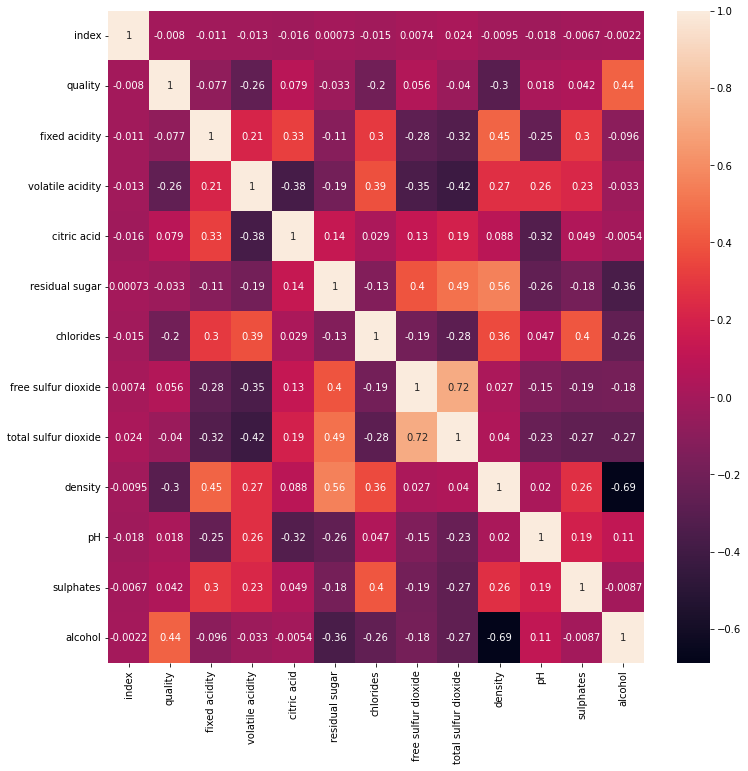

In [6]:
# train의 변수 간 상관관계를 살펴봅니다. (칼럼에 있는 변수들 간)

# 상관계수는 두 변수 간 관련성을 나타내는 것일 뿐, 인과관계를 나타내는 것은 아님
# A와 B의 상관관계가 높다는 이야기는 함께 움직이는 경향이 있다는 것이지, 
# A를 증가하게 만들면 B가 증가할 것이다 X!!!

# corr() -> 기본적으로 피어슨 상관계수 (-1 ~ +1)
# 데이터프레임.corr()
plt.figure(figsize=(12,12))
sns.heatmap(data = train.corr(), annot=True) #annot : 숫자 출력

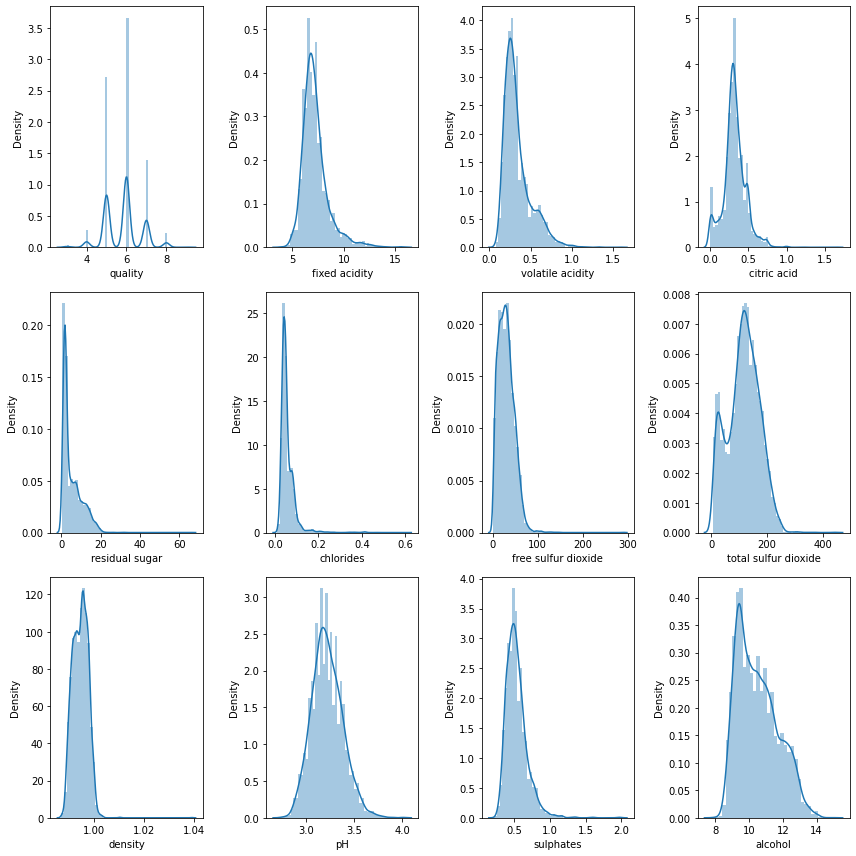

In [7]:
# train의 각 변수별 분포를 살펴봅니다. 

#sns.distplot(tips['total_bill'], kde=False(선 없애기), bins=30(30개로 나눠 표기))

plt.figure(figsize=(12,12))
for i in range(1,13):#index 제외하고
    plt.subplot(3,4,i) #plt.subplot(행, 열, 인덱스)
    sns.distplot(train.iloc[:,i]) #iloc[행 번호, 열(칼럼)] <-> loc : label과 index or 조건표현으로 선택하는 방법
plt.tight_layout() # 여백에 관련한 subplot 파라미터 조정,입력 없이 사용하면 자동 조정
plt.show()

#y축 Density 데이터프레임에 있는 그 밀도가 아님..,  값 수를 의미하는 듯

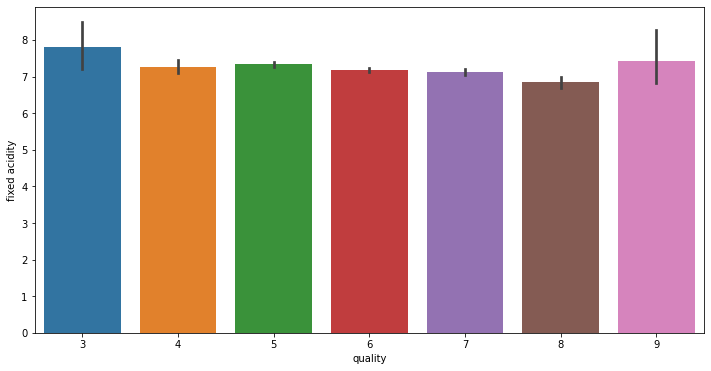

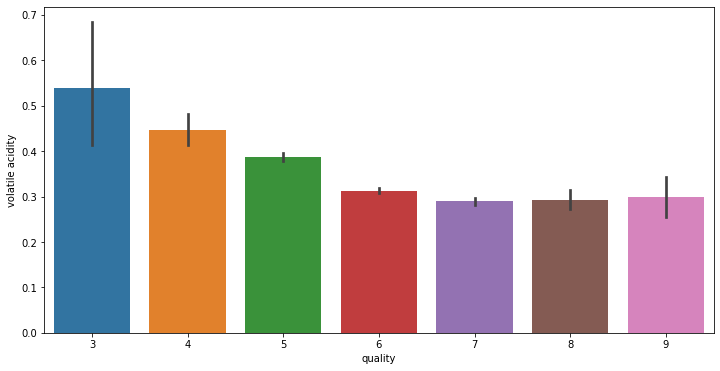

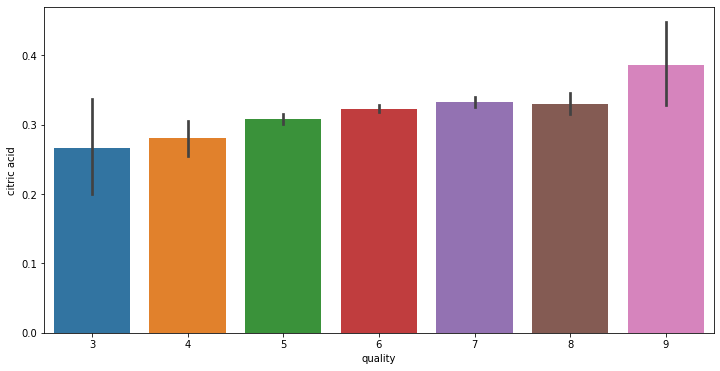

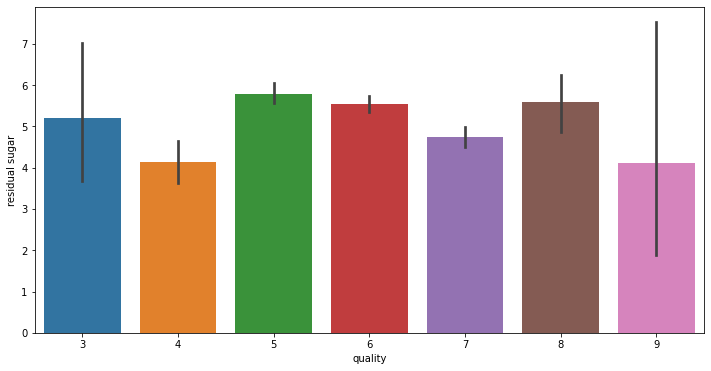

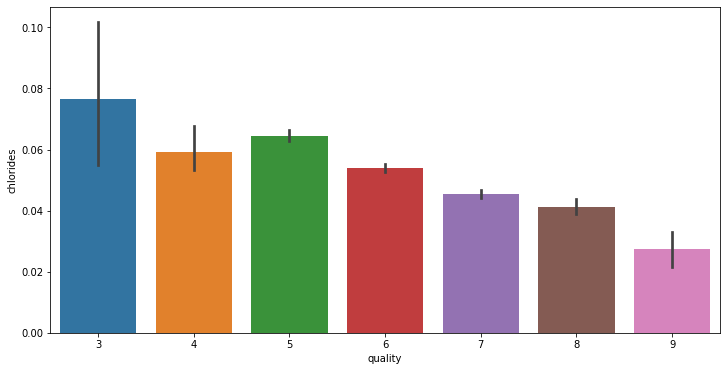

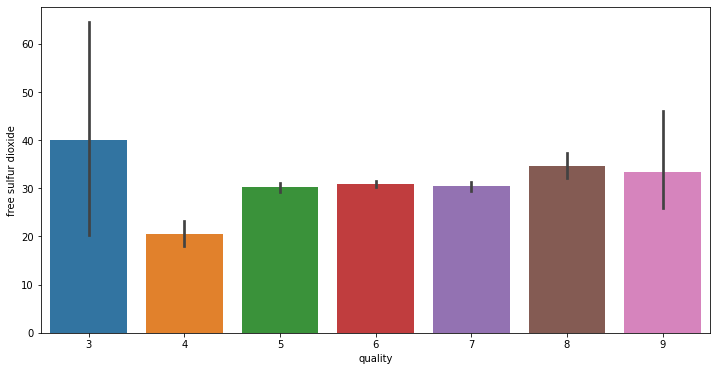

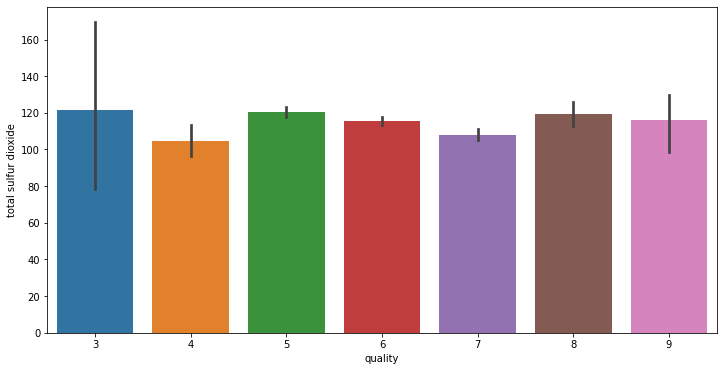

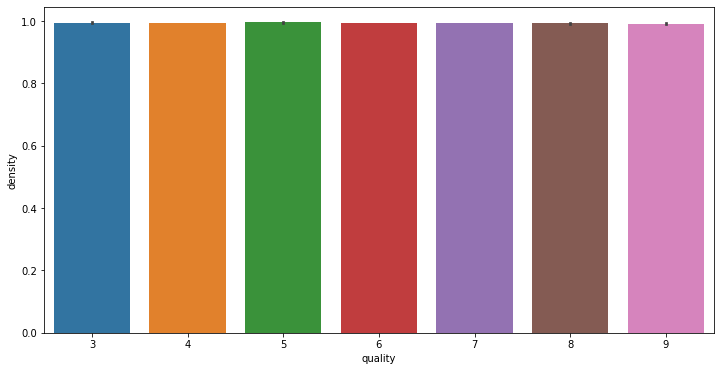

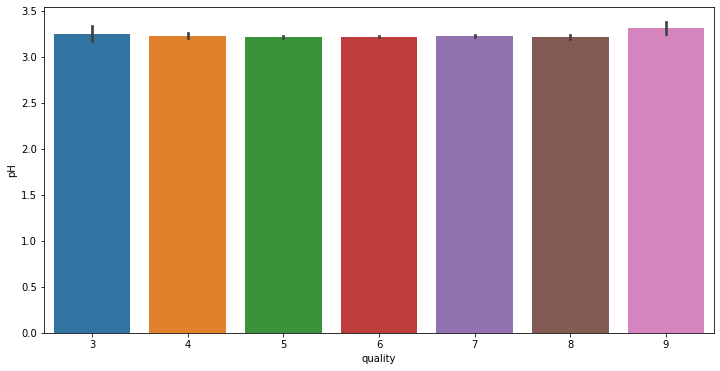

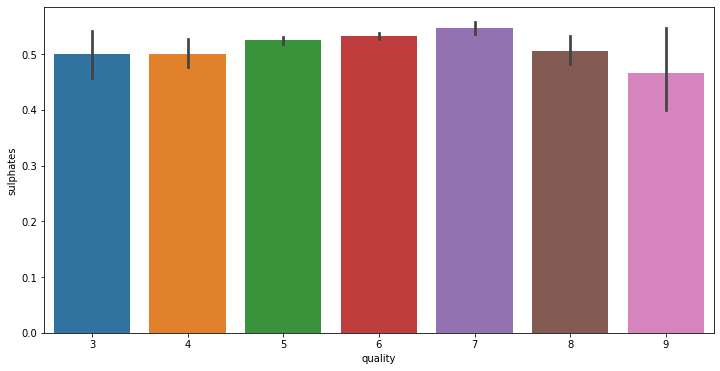

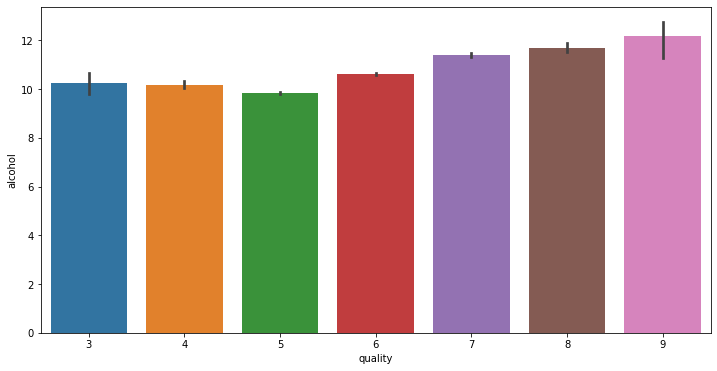

In [8]:
# train에서 각 변수와 quality 변수 사이 분포를 확인합니다.
for i in range(11):
    fig = plt.figure(figsize = (12,6))
    sns.barplot(x = 'quality', y = train.columns[i+2], data = train)

# 3. 데이터 전처리

LabelEncoder : 트리 계열의 ML 알고리즘에 사용 

🚫 but 선형 회귀와 같은 ML 알고리즘에는 적용 X (더 큰 값으로 가중치 부여됨)

In [9]:
# type에는 white와 red 두 종류가 있습니다.
# 각각 0,1로 변환합니다.
# 문자 -> 숫자
from sklearn.preprocessing import LabelEncoder


enc = LabelEncoder() 
enc.fit(train['type'])
train['type'] = enc.transform(train['type'])
test['type'] = enc.transform(test['type'])


In [10]:
print(train['type'])
print(enc.classes_)

0       1
1       0
2       1
3       1
4       1
       ..
5492    1
5493    1
5494    1
5495    1
5496    1
Name: type, Length: 5497, dtype: int64
['red' 'white']


In [11]:
train.head()

,index,quality,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,type
0,0,5,5.6,0.695,0.06,6.8,0.042,9.0,84.0,0.99432,3.44,0.44,10.2,1
1,1,5,8.8,0.610,0.14,2.4,0.067,10.0,42.0,0.99690,3.19,0.59,9.5,0
2,2,5,7.9,0.210,0.39,2.0,0.057,21.0,138.0,0.99176,3.05,0.52,10.9,1
3,3,6,7.0,0.210,0.31,6.0,0.046,29.0,108.0,0.99390,3.26,0.50,10.8,1
4,4,6,7.8,0.400,0.26,9.5,0.059,32.0,178.0,0.99550,3.04,0.43,10.9,1


In [12]:
train.tail()

,index,quality,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,type
5492,5492,5,7.7,0.15,0.29,1.3,0.029,10.0,64.0,0.99320,3.35,0.39,10.1,1
5493,5493,6,6.3,0.18,0.36,1.2,0.034,26.0,111.0,0.99074,3.16,0.51,11.0,1
5494,5494,7,7.8,0.15,0.34,1.1,0.035,31.0,93.0,0.99096,3.07,0.72,11.3,1
5495,5495,5,6.6,0.41,0.31,1.6,0.042,18.0,101.0,0.99195,3.13,0.41,10.5,1
5496,5496,6,7.0,0.35,0.17,1.1,0.049,7.0,119.0,0.99297,3.13,0.36,9.7,1


In [13]:
# 불필요한 변수 제거
train_x = train.drop(['index', 'quality'], axis = 1) # axis = 0 (행), axis = 1 (열)
train_y = train['quality']
test_x = test.drop('index', axis = 1)

In [14]:
train_x.shape, train_y.shape, test_x.shape

((5497, 12), (5497,), (1000, 12))

# 4. 모델링


In [15]:
from sklearn.ensemble import RandomForestClassifier
# 모델 선언
 
model = RandomForestClassifier(random_state=0, n_jobs = -1) #n_jobs = -1 -> 모든 CPU 코어 이용해 학습
# random_state=0 -> 수행시마다 동일한 결과를 얻기 위해 (seed 값을 고정, 어떤 값으로 해도 상관 X)

#모델 학습
model.fit(train_x, train_y)


RandomForestClassifier(n_jobs=-1, random_state=0)

## ✓ GridSearchCV :

교차 검증을 기반으로 최적 하이퍼 파라미터 튜닝(오래 걸림)


---



분류 or 회귀 알고리즘에 사용되는 하이퍼 파라미터를 순차적으로 입력하면서 편리하게 최적의 파라미터 도출

다음과 같은 파라미터 집합을 만들고 이를 순차적으로 적용하면서 최적화



`grid_dtree = GridSearchCV(dtree, param_grid=parameters(딕셔너리), cv=3, refit=True)`

- estimator : classifier, regressor, pipeine 

- cv : 분할할 폴딩 세트 수(교차 검증을 위해 분할되는 학습/테스트 세트의 개수) ----> param_grid의 하이퍼 파라미터들을 3개의 train, test set fold 로 나누어서 테스트 수행 설정.  (학습/평가 수 = cv*파라미터 조합 수)

- refit=True 가 default 임. True이면 가장 좋은 파라미터를 찾은 뒤, 최적의 설정으로 재 학습 시킴.  

In [29]:

#get_params().keys() -> 모델(랜덤포레스트) 파라미터 변수들 보여줌
#이거 해서 나오는 변수들을 파라미터에 넣음
model.get_params().keys()


dict_keys(['bootstrap', 'ccp_alpha', 'class_weight', 'criterion', 'max_depth', 'max_features', 'max_leaf_nodes', 'max_samples', 'min_impurity_decrease', 'min_samples_leaf', 'min_samples_split', 'min_weight_fraction_leaf', 'n_estimators', 'n_jobs', 'oob_score', 'random_state', 'verbose', 'warm_start'])

In [42]:

#GridSearchCV로 최적의 파라미터 찾아보자

%%time
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

params = {
    "max_depth" : [18,20,22,25,30],  
    "min_samples_leaf" : [2,3,4,6,8],
    "min_samples_split" : [33,35,40,45,50],         
    "n_estimators" : [22,25,30,35,38],    
}


grid_cv = GridSearchCV(model, param_grid = params, cv =10, n_jobs = -1)


CPU times: user 66 µs, sys: 4 µs, total: 70 µs
Wall time: 76.1 µs


In [43]:

%%time

grid_cv.fit(train_x,train_y)

print("최적의 하이퍼 파라미터 : ", grid_cv.best_params_) 
#cv : 분할할 폴딩 세트 수(교차 검증을 위해 분할되는 학습/테스트 세트의 개수) --> 학습/평가 수 = cv*파라미터 조합 수
print("최고 예측 정확도 : {0:.4f}" .format(grid_cv.best_score_))


scores_df = pd.DataFrame(grid_cv.cv_results_)
scores_df.columns
scores_df[['params', 'mean_test_score', 'rank_test_score']]


최적의 하이퍼 파라미터 :  {'max_depth': 22, 'min_samples_leaf': 2, 'min_samples_split': 33, 'n_estimators': 38}
최고 예측 정확도 : 0.6162
CPU times: user 44.5 s, sys: 2.82 s, total: 47.3 s
Wall time: 21min 47s


In [44]:
# 학습된 모델로 test 데이터 예측
y_pred = model.predict(test_x)
y_pred

array([6, 6, 6, 5, 6, 6, 6, 6, 6, 7, 6, 6, 7, 6, 6, 5, 6, 6, 6, 5, 6, 6,
       5, 7, 6, 5, 5, 5, 6, 5, 7, 6, 5, 5, 5, 6, 5, 5, 6, 6, 6, 5, 6, 6,
       6, 7, 5, 6, 4, 6, 5, 5, 6, 4, 5, 6, 6, 5, 5, 6, 5, 6, 6, 4, 6, 6,
       5, 5, 6, 5, 5, 5, 5, 6, 6, 5, 6, 6, 6, 7, 6, 6, 5, 5, 6, 6, 5, 5,
       6, 7, 6, 6, 6, 6, 6, 7, 6, 6, 6, 6, 5, 6, 6, 5, 6, 6, 6, 6, 7, 5,
       6, 6, 6, 5, 5, 6, 6, 7, 6, 6, 6, 5, 6, 7, 5, 5, 6, 6, 6, 7, 5, 5,
       4, 5, 5, 6, 6, 7, 5, 5, 5, 6, 5, 5, 5, 5, 7, 6, 6, 6, 5, 8, 6, 5,
       6, 5, 6, 6, 6, 5, 5, 6, 6, 6, 6, 5, 5, 6, 5, 6, 5, 5, 6, 5, 6, 5,
       6, 5, 6, 6, 6, 6, 7, 7, 5, 6, 6, 6, 5, 6, 6, 6, 5, 6, 6, 6, 7, 5,
       5, 5, 6, 5, 6, 5, 5, 5, 6, 6, 6, 6, 7, 5, 5, 5, 6, 6, 6, 6, 6, 7,
       6, 5, 6, 6, 7, 6, 6, 5, 6, 5, 6, 7, 7, 6, 6, 6, 5, 6, 6, 7, 6, 6,
       6, 6, 7, 6, 6, 7, 5, 6, 5, 6, 6, 7, 6, 6, 6, 7, 6, 6, 7, 5, 5, 7,
       5, 5, 6, 5, 6, 6, 6, 5, 5, 5, 6, 5, 7, 7, 5, 6, 6, 6, 6, 5, 7, 7,
       5, 6, 6, 6, 5, 5, 5, 6, 5, 7, 8, 6, 5, 7, 7,

In [20]:
#accuracy = accuracy_score(y_test,y_pred)
#print("랜덤 포레스트 정확도 : {0:4.f} .format(accuracy)")
#y_test 값 모르니까 pass

# 5. 제출 파일 생성

In [25]:
submission = pd.read_csv('sample_submission.csv')

In [26]:
submission['quality'] = y_pred

In [27]:
submission

,index,quality
0,0,6
1,1,6
2,2,6
3,3,5
4,4,6
...,...,...
995,995,6
996,996,6
997,997,5
998,998,6


In [28]:
# csv 파일로 저장합니다.
submission.to_csv('baseline.csv', index=False)